# Report 2 - Linked List and Binary Search Tree
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions

1. **Singly Linked List** - it's a list that can be traversed only from the beginning to the end. 
The main advantage of this data structure is that each node can be stored anywhere in the memory and each node points to its successor. It allocates the memory dynamically and optimizes memory usage.  The main disadvantage is the fact that we have to access elements sequentially from the first node. Also, we can only move in one direction. Therefore searching for an element or sorting or appending an element to a list takes O(n) time.


2. **Binary Search Tree** - data structure, where for each node the nodes on its left have exclusively lower values and the nodes on its right exclusively higher values. 
The main advantages of a BST are its fast search, insertion and deletion speeds. Unfortunately these actions are fast only when the tree is balanced, which may be hard to achieve in some situations. A BST is also not well suited for applications, where data will be accessed randomly, as it has longer access times than e.g an array or a hashmap.

### Time complexity comparison

**Singly Linked List**
|  | Insert | Search | Remove | Min / Max | Number of elements |
| --- | --- | --- | --- | --- | ---  |
| Worst Case| $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ |
| Average Case | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ |
| Best Case | $O(1)$ | $O(1)$ | $O(1)$ | $O(n)$ | $O(n)$ |

**Binary Search Tree**
|  | Insert | Search | Remove | Min / Max | Number of elements |
| --- | --- | --- | --- | --- | ---  |
| Worst Case |$O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ |
| Average Case | $O(log(n))$ | $O(log(n))$ | $O(log(n))$ | $O(log(n))$ | $O(n)$ |
| Best Case | $O(1)$ | $O(1)$ | $O(1)$ | $O(log(n))$ | $O(n)$ |

## Code

### Linked List

In [2]:
class Node:
    def __init__(self, data, nxt=None) -> None:
        self.val = data
        self.next = nxt

    def add(self, data):
        while self.next is not None:
            self = self.next
        self.next = Node(data)
    
    def exist(self, data):
        while self.val != data and self.next is not None:
            self = self.next

        return self.val == data
        
    def remove(self, data):
        if not self.exist(data):
            print(f'Remove: given element ({data}) does not exist')
            return 

        if self.val == data: # removing the first element
            self.val = self.next.val
            self.next = self.next.next if self.next.next is not None else None
            print(f'Removed {data} succesfully')
            return

        while self.next is not None: # removing anything else
            if self.next.val == data and self.next.next is None:
                self.next = None
                print(f'Removed {data} succesfully')
                return
            elif self.next.val == data:
                self.next = self.next.next
            else:
                self = self.next

    def maxi(self, M=-2147483647):
        while self.next is not None:
            if self.val > M:
                M = self.val
            self = self.next

        return max(self.val, M)
        
    def mini(self, m=2147483647):
        while self.next is not None:
            if self.val < m:
                m = self.val
            self = self.next

        return min(self.val, m)
        
    def total_elements(self, count=0):
        if self.val is not None:
            count += 1

        while self.next is not None:
            count += 1
            self = self.next

        return count
            
    def __str__(self) -> str:
        s = f'{self.val}'
        while self.next is not None:
            self = self.next
            s += f' -> {self.val}'
        return s

Testing

In [3]:
List = Node(5)
List.add(3)
List.add(1)
List.add(2)
List.add(4)
print(f'Before removal: {List}')
List.remove(5)
List.remove(7)
print(f'After removal: {List}')
print(f'2 exists in the list: {List.exist(2)}')
print(f'5 exists in the list: {List.exist(5)}')
print(f'Max element: {List.maxi()}')
print(f'Min element: {List.mini()}')
print(f'Total elements: {List.total_elements()}')

Before removal: 84267 -> 14044 -> 5 -> 3 -> 1 -> 2 -> 4
Remove: given element (7) does not exist
After removal: 84267 -> 14044 -> 3 -> 1 -> 2 -> 4
2 exists in the list: True
5 exists in the list: False
Max element: 84267
Min element: 1
Total elements: 6


### Binary Search Tree

In [4]:
from graphviz import Digraph
import random

def print_tree(root):
    dot = Digraph("Tree",strict=False)
    dot.format='png'
    dot.node("RT",str(root.val))
    def add_rec(dot:Digraph,node,name,parent_name="RT"):
        if node is None:return
        dot.node(name,str(node.val))
        if name != "RT":dot.edge(parent_name,name)

        add_rec(dot, node.left, f"{name}L", name)
        add_rec(dot, node.right, f"{name}R", name)

    add_rec(dot,root,"RT")
    dot.view()

class tree_node:
    def __init__(self,val,parent=None,left=None,right=None) -> None:
        self.val = val
        self.parent = parent
        self.left = left
        self.right = right

class tree:
    def __init__(self,val) -> None:
        self.anchor = tree_node(-float("inf")) #we need an anchor so that every node with a value has a parent
        self.root_node = self.anchor
        self.insert(val)
        self.root_node = self.anchor.right
    
    def insert(self,value):
        curr = self.root_node
        while curr != None:
            if value >= curr.val:
                if curr.right is None:
                    curr.right = tree_node(value,curr)
                    return 0
                else:
                    curr = curr.right
            elif curr.left is None:
                curr.left = tree_node(value,curr)
                return True
            else:
                curr = curr.left
        return False
    
    #returns node with value from subtree with root=root or None if value is not in tree
    def getnode(self,value,root = None):
        curr = self.root_node if root is None else root
        while (curr != None):
            if value == curr.val:return curr
            else:
                curr = curr.right if value > curr.val else curr.left
        return None
    def contains(self,value):
        return bool(self.getnode(value))
    
    def min(self,node = None):
        curr = self.root_node if node is None else node
        mini = curr.val
        while (curr := curr.left) != None:
            if curr.val < mini: mini = curr.val
        return mini
    
    def max(self,node = None):
        curr = self.root_node if node is None else node
        mx = curr.val
        while (curr := curr.right) != None:
            if curr.val > mx: mx = curr.val
        return mx

    def num_elements(self,node = None):
        if node is None: node = self.root_node
        return 1 + (self.num_elements(node.left) if node.left != None else 0) + (self.num_elements(node.right) if node.right != None else 0) 
    
    def remove(self,value,root = None):
        n = self.getnode(value, self.root_node if root is None else root)
        if n is None:
            print(f"Node with value {value} does not exist") 
            return False

        if n.left is None and n.right is None:
            if n.parent.val <= n.val: n.parent.right = None
            else: n.parent.left = None
            del n
        elif n.left is not None and n.right is not None:
            n.val = self.min(n.right)
            self.remove(n.val,n.right)
        else:
            node_to_connect = n.left if n.left != None else n.right
            if n.parent.val <= n.val: n.parent.right = node_to_connect
            else: n.parent.left = node_to_connect
            node_to_connect.parent = n.parent
            if n == self.root_node: self.root_node = self.anchor.right
            del n

Testing

Number of elements: 101


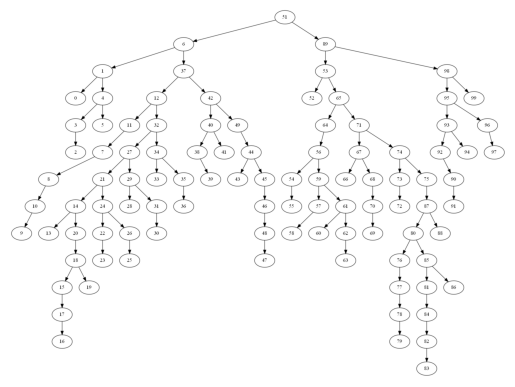

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n=100
t = tree(n//2)

arr = list(range(n))
for i in [arr.pop(random.randint(0,n-i-1)) for i in range(n)]:
    t.insert(i)

print(f'Number of elements: {t.num_elements()}')
t.remove(n//2)
t.remove(n//2)
print_tree(t.root_node)

img = mpimg.imread('Tree.gv.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

### Timer

In [7]:
import linked_list
from bst import tree
import random
import timeit
import numpy as np

# Linked list timings
print('Linked List')
list_times = []
l = linked_list.Node(random.randint(0, 100000))

for i in range(1000, 51000, 1000):
    for _ in range(1000):
        l = linked_list.Node(random.randint(0, 100000), l)
        
    result = round((timeit.timeit(lambda: l.exist(random.randint(0, 100000)), number=10000) * 1000) / 10000, 5)
    print(f'{i} elements: {result} s search time')
    list_times.append(result)

np.savetxt('linked_list.txt', list_times, delimiter=' ')

# BST timings
print('Binary Search Tree')

def maketree(n:int)->tree:
    t = tree(n//2)
    arr = [random.randint(0,n) for _ in range(n)]
    for i in arr:
        t.insert(i)

    return t

min_n = 1000
max_n = 51000
step = 1000
results = []

for n in range(min_n,max_n,step):
    t = maketree(n)
    result = round((timeit.timeit(lambda: t.contains(random.randint(0,n)), number=10000) * 1000) / 10000, 5)
    print(f'{n} elements: {result} s search time')
    results.append(result)
    del t

np.savetxt('bst.txt', results, delimiter=' ')

Linked List
1000 elements: 0.04019 s search time
2000 elements: 0.07006 s search time
3000 elements: 0.10326 s search time
4000 elements: 0.13762 s search time
5000 elements: 0.17617 s search time
6000 elements: 0.21317 s search time
7000 elements: 0.26115 s search time
8000 elements: 0.38843 s search time
9000 elements: 0.48696 s search time
10000 elements: 0.53764 s search time
11000 elements: 0.58314 s search time
12000 elements: 0.60983 s search time
13000 elements: 0.63 s search time
14000 elements: 0.74814 s search time
15000 elements: 0.73912 s search time
16000 elements: 0.82904 s search time
17000 elements: 0.83058 s search time
18000 elements: 0.90012 s search time
19000 elements: 0.94812 s search time
20000 elements: 1.00147 s search time
21000 elements: 1.0225 s search time
22000 elements: 1.07217 s search time
23000 elements: 1.16406 s search time
24000 elements: 1.2486 s search time
25000 elements: 1.27919 s search time
26000 elements: 1.34782 s search time
27000 elements

## Graphs

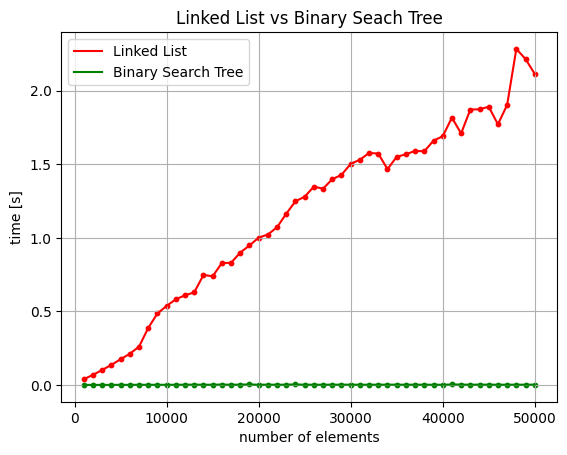

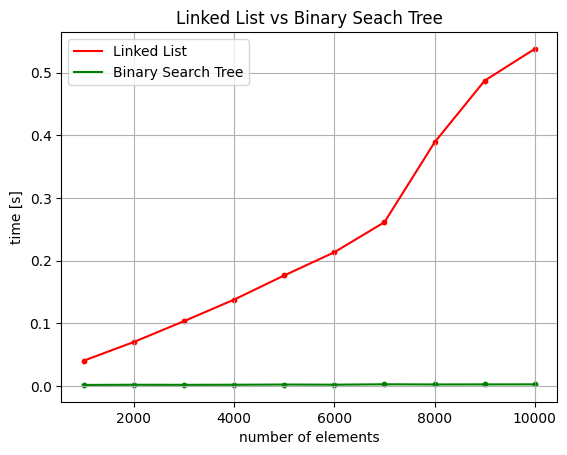

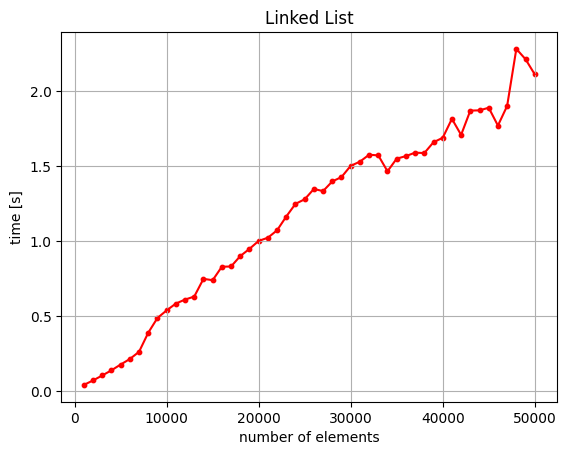

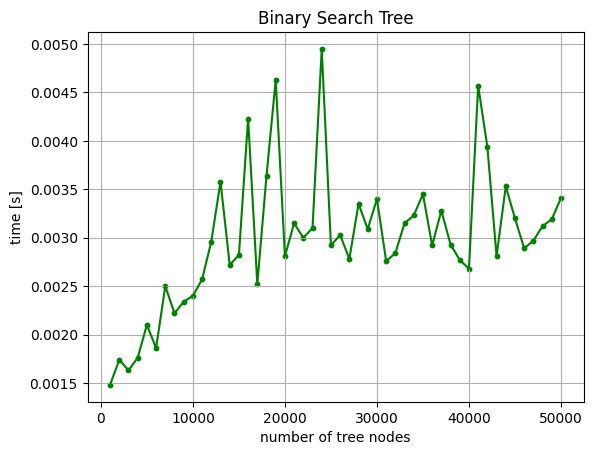

In [11]:
# Load and rearrange the data
linked_list = np.loadtxt('linked_list.txt', delimiter=' ')
bst = np.loadtxt('bst.txt', delimiter=' ')
x = list(range(1000, 51000, 1000))

# Plot: Linked List vs Binary Search Tree

plt.plot(x, linked_list, color='red', label='Linked List')
plt.plot(x, bst, color='green', label='Binary Search Tree')

plt.scatter(x, linked_list, s=10, c='red', marker='o')
plt.scatter(x, bst, s=10, c='green', marker='o')

plt.title('Linked List vs Binary Seach Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()

# Plot: Linked List vs Binary Search Tree (restricted)

plt.plot(x[:10], linked_list[:10], color='red', label='Linked List')
plt.plot(x[:10], bst[:10], color='green', label='Binary Search Tree')

plt.scatter(x[:10], linked_list[:10], s=10, c='red', marker='o')
plt.scatter(x[:10], bst[:10], s=10, c='green', marker='o')

plt.title('Linked List vs Binary Seach Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()

# Plot: Linked List

plt.plot(x, linked_list, color='red')

plt.scatter(x, linked_list, s=10, c='red', marker='o')

plt.title('Linked List')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.grid(True)
plt.show()


# Plot: Binary Search Tree
plt.plot(x, bst, color='green')

plt.scatter(x, bst, s=10, c='green', marker='o')

plt.title('Binary Search Tree')
plt.xlabel('number of tree nodes')
plt.ylabel('time [s]')
plt.grid(True)
plt.show()